# Diabetes


In this project we are going to analyze two datasets about patients with diabetes. This project has two parts, part 1 is analyzing the datasets and finding out which attributes/columns have the most impact on the target variable which indicates the patients with and without diabetes. Part 2 we are going to create a fucntion that calculates the risk score based on most important attributes from part 1. 

# part 1:

## Importing two diabetes datasets: 

One is from India and the other from Germany
## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage and the other is taken from the hospital Frankfurt, Germany, so we can assume they are mostly Germans.
### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing PIMA-INDIANS-DIABETES dataset from networkrepository. https://networkrepository.com/pima-indians-diabetes.php 

In [2]:
#CSV file
ind_df = pd.read_csv('diabetes.csv')

In [3]:
ind_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
ind_df.shape

(768, 9)

Importing Dataset of diabetes, taken from the hospital Frankfurt, Germany diabetes. https://www.kaggle.com/datasets/johndasilva/diabetes

In [5]:
#Excel File
ger_df = pd.read_excel('diabetesGermany.xlsx')

In [6]:
ger_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
ger_df.shape

(2000, 9)

In [8]:
ind_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
ger_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
ind_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
ger_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# Data Merging

By looking at some statistical summaries we can see the two datasets are pretty close so we can combine them, and do some data analysis and visualization as a whole diabetes dataset.

In [12]:
frames = [ind_df, ger_df]

In [13]:
dia_df = pd.concat(frames)

In [14]:
dia_df.reset_index(inplace=True)

In [15]:
dia_df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
dia_df=dia_df.drop(columns=(['index']))

In [17]:
dia_df.shape

(2768, 9)

In [18]:
dia_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1
2767,2,81,72,15,76,30.1,0.547,25,0


# Data Aggregation

In [19]:
dia_df.agg(
    {
        "Age": ["min", "max", "median", "skew","mean"],
        "Pregnancies": ["min", "max", "median", "mean"],
        "BMI": ["min", "max", "median", "mean"],
        "Glucose": ["min", "max", "median", "mean"]
    }
)

,Age,Pregnancies,BMI,Glucose
max,81.000000,17.000000,80.600000,199.000000
mean,33.132225,3.742775,32.137392,121.102601
median,29.000000,3.000000,32.200000,117.000000
min,21.000000,0.000000,0.000000,0.000000
skew,1.166299,NaN,NaN,NaN


In [20]:
dia_df[["Pregnancies", "Age"]].groupby("Pregnancies").mean()

,Age
Pregnancies,
0,27.686893
1,27.421589
2,27.139535
3,29.048148
4,33.088803
5,38.914141
6,39.767956
7,41.482759
8,45.455224


In [21]:
dia_df.groupby("Pregnancies",as_index=False).mean(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,123.291262,67.050971,22.638350,83.053398,34.063107,0.504170,27.686893,0.334951
1,1,114.069246,68.501018,24.376782,100.175153,31.716497,0.496886,27.421589,0.219959
2,2,110.180879,63.116279,21.565891,84.023256,30.904134,0.492465,27.139535,0.173127
3,3,124.225926,65.792593,20.418519,89.111111,30.357037,0.427604,29.048148,0.359259
4,4,125.023166,69.779923,15.830116,66.594595,32.374517,0.443085,33.088803,0.347490
5,5,118.691919,76.045455,17.449495,55.914141,33.210606,0.381359,38.914141,0.368687
6,6,122.535912,69.309392,17.856354,58.773481,30.993370,0.434912,39.767956,0.331492
7,7,137.579310,71.813793,22.600000,95.462069,32.567586,0.455510,41.482759,0.558621
8,8,132.671642,74.932836,17.820896,90.216418,32.311194,0.515769,45.455224,0.559701
9,9,130.489796,77.826531,20.265306,58.622449,31.529592,0.545643,44.795918,0.612245


In [22]:
# as number of Pregnancies increases outcome is getting closer to 1

In [23]:
dia_df["Pregnancies"].value_counts()

1     491
0     412
2     387
3     270
4     259
5     198
6     181
7     145
8     134
9      98
10     78
11     35
13     32
12     32
14      9
17      4
15      3
Name: Pregnancies, dtype: int64

In [24]:
dia_df["Age"].value_counts()

22    264
21    229
25    182
24    168
23    141
28    133
26    117
27    113
29     99
31     82
30     77
41     73
37     67
42     66
36     62
38     61
33     60
45     57
40     48
39     48
34     48
46     48
32     47
43     47
35     37
50     29
58     28
44     28
52     27
47     23
51     21
49     19
48     19
55     18
54     18
63     17
66     16
53     15
62     14
67     13
60     12
57     12
65     11
56     10
59      9
69      8
61      7
81      4
64      4
68      4
70      4
72      4
Name: Age, dtype: int64

In [25]:
dia_df["BloodPressure"].value_counts()

70     201
74     197
78     173
68     170
64     163
72     162
80     138
76     132
60     129
62     128
0      125
82     113
66      95
88      92
84      84
90      77
58      75
86      74
50      44
56      43
54      42
52      40
75      28
65      26
94      24
92      20
85      20
48      18
44      15
106     12
96      12
100     12
98      11
110     10
46       8
108      7
104      7
55       6
61       5
30       5
102      4
122      4
114      4
38       4
40       3
24       3
95       3
Name: BloodPressure, dtype: int64

In [26]:
dia_df["Glucose"].value_counts()

99     66
100    61
102    52
129    51
106    50
       ..
177     3
62      3
191     3
44      3
198     3
Name: Glucose, Length: 136, dtype: int64

In [27]:
#Data Diversity
counts = dia_df.nunique().sort_values(ascending=False)
counts

DiabetesPedigreeFunction    606
BMI                         253
Insulin                     187
Glucose                     136
SkinThickness                53
Age                          52
BloodPressure                47
Pregnancies                  17
Outcome                       2
dtype: int64

In [28]:
# DiabetesPedigreeFunction has the greatest number of distinct values

In [29]:
dia_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


In [30]:
# Glucose has highest correlation with target

# Data Visualization

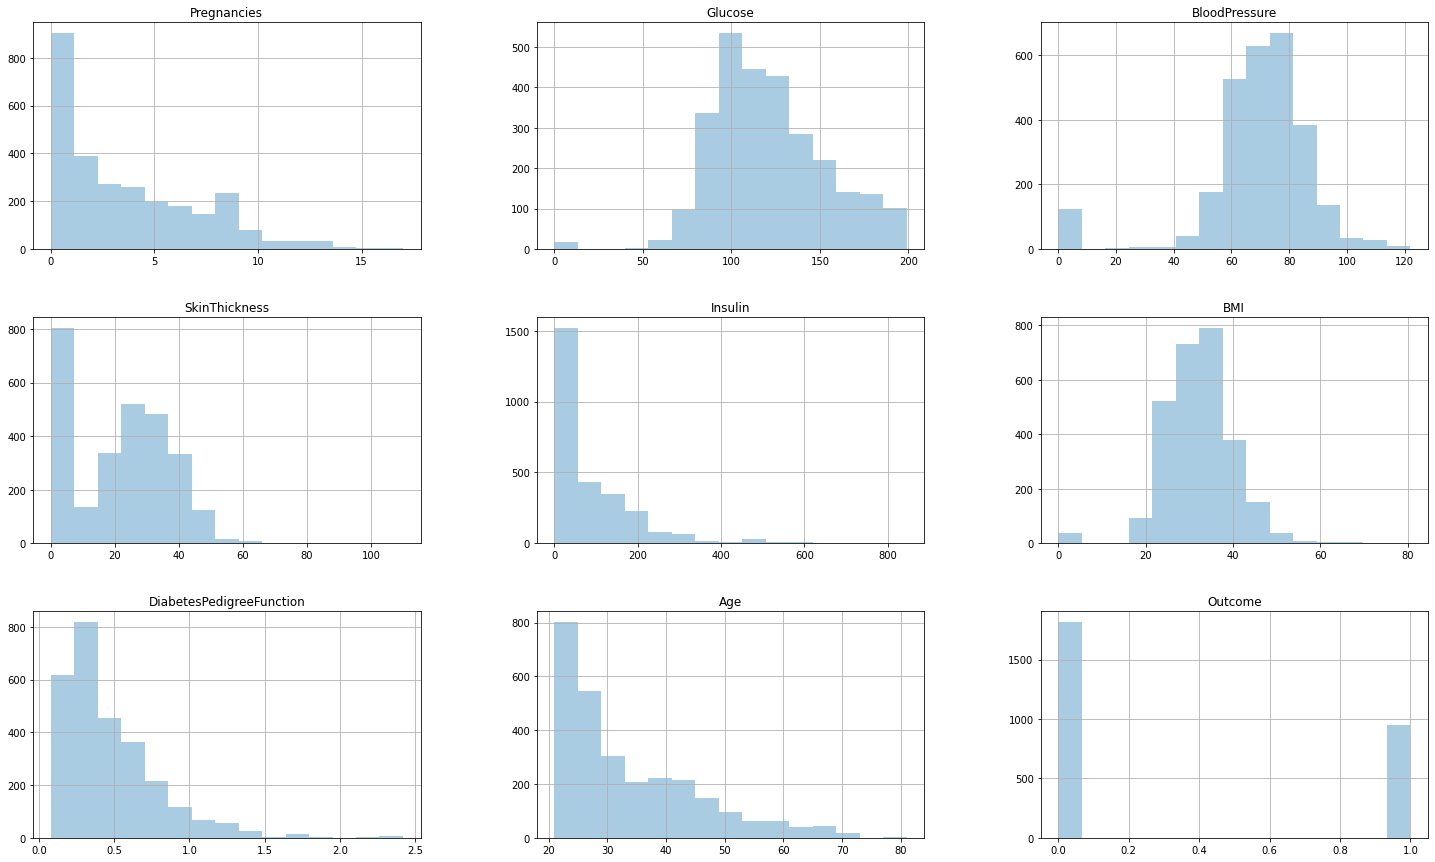

In [31]:
color = '#a9cce3'
dia_df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18

In [32]:
Pregnancies =dia_df.groupby("Pregnancies",as_index=False).mean(numeric_only=True)

In [33]:
Pregnancies.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.618228,0.517345,0.559980,0.119472,0.670747,0.032528,0.864681,0.867972
Glucose,0.618228,1.000000,0.197296,0.615946,0.315600,0.692615,0.394341,0.493154,0.796967
BloodPressure,0.517345,0.197296,1.000000,-0.019461,-0.208410,0.220391,0.115366,0.809261,0.329938
SkinThickness,0.559980,0.615946,-0.019461,1.000000,0.745591,0.678273,0.225042,0.272940,0.658327
Insulin,0.119472,0.315600,-0.208410,0.745591,1.000000,0.255016,-0.024261,-0.043055,0.340240
BMI,0.670747,0.692615,0.220391,0.678273,0.255016,1.000000,0.275464,0.441744,0.751357
DiabetesPedigreeFunction,0.032528,0.394341,0.115366,0.225042,-0.024261,0.275464,1.000000,0.089894,-0.038335
Age,0.864681,0.493154,0.809261,0.272940,-0.043055,0.441744,0.089894,1.000000,0.663118
Outcome,0.867972,0.796967,0.329938,0.658327,0.340240,0.751357,-0.038335,0.663118,1.000000


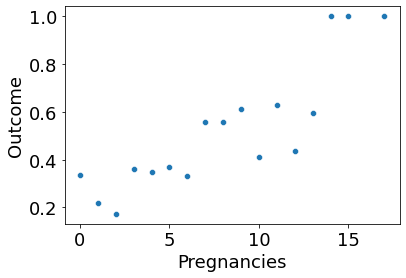

In [34]:
sns.scatterplot(data=Pregnancies, x='Pregnancies', y='Outcome') # we can see the positive correlation

In [35]:
Glucose =dia_df.groupby("Glucose",as_index=False).mean(numeric_only=True)

In [36]:
Glucose.corr()

,Glucose,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.165243,0.311476,0.165108,0.492133,0.447813,0.281643,0.328355,0.794903
Pregnancies,0.165243,1.000000,0.396275,-0.161047,-0.123764,-0.025167,-0.131835,0.557012,0.154479
BloodPressure,0.311476,0.396275,1.000000,0.132572,0.148409,0.329478,0.006296,0.459431,0.262156
SkinThickness,0.165108,-0.161047,0.132572,1.000000,0.547992,0.316753,0.398086,-0.207473,0.204144
Insulin,0.492133,-0.123764,0.148409,0.547992,1.000000,0.349639,0.356209,-0.035817,0.418731
BMI,0.447813,-0.025167,0.329478,0.316753,0.349639,1.000000,0.311932,0.130252,0.444281
DiabetesPedigreeFunction,0.281643,-0.131835,0.006296,0.398086,0.356209,0.311932,1.000000,-0.129527,0.282711
Age,0.328355,0.557012,0.459431,-0.207473,-0.035817,0.130252,-0.129527,1.000000,0.341227
Outcome,0.794903,0.154479,0.262156,0.204144,0.418731,0.444281,0.282711,0.341227,1.000000


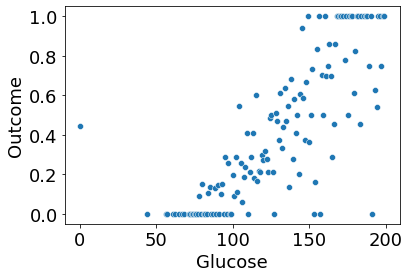

In [37]:
sns.scatterplot(data=Glucose, x='Glucose', y='Outcome') 
#strong correlation

As Glucose increases target is getting closer to 1 which indicates a strong positive correlation. For Glucose more that 130 most of data tends to be closer to 1.

In [38]:
BloodPressure =dia_df.groupby("BloodPressure",as_index=False).mean(numeric_only=True)

In [39]:
BloodPressure.corr()

,BloodPressure,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,1.000000,0.480855,0.439671,-0.034805,-0.208359,0.316780,-0.218853,0.571768,0.406108
Pregnancies,0.480855,1.000000,0.359961,-0.196778,-0.318837,0.218444,-0.307051,0.592755,0.272995
Glucose,0.439671,0.359961,1.000000,0.070592,-0.038684,0.316949,-0.036158,0.641712,0.451232
SkinThickness,-0.034805,-0.196778,0.070592,1.000000,0.588739,0.627510,0.394715,-0.001801,0.190935
Insulin,-0.208359,-0.318837,-0.038684,0.588739,1.000000,0.205754,0.346685,-0.333595,0.035582
BMI,0.316780,0.218444,0.316949,0.627510,0.205754,1.000000,0.341322,0.295447,0.625004
DiabetesPedigreeFunction,-0.218853,-0.307051,-0.036158,0.394715,0.346685,0.341322,1.000000,-0.351843,0.104155
Age,0.571768,0.592755,0.641712,-0.001801,-0.333595,0.295447,-0.351843,1.000000,0.375038
Outcome,0.406108,0.272995,0.451232,0.190935,0.035582,0.625004,0.104155,0.375038,1.000000


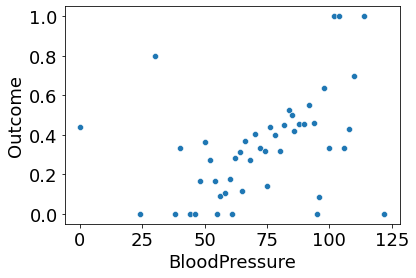

In [40]:
sns.scatterplot(data=BloodPressure, x='BloodPressure', y='Outcome') # There is a posetive correlation but not a very strong one. 

In [41]:
SkinThickness =dia_df.groupby("SkinThickness",as_index=False).mean(numeric_only=True)

In [42]:
SkinThickness.corr()

,SkinThickness,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
SkinThickness,1.000000,-0.166804,0.650826,-0.138375,0.137236,0.763132,0.237950,0.277061,0.393255
Pregnancies,-0.166804,1.000000,-0.029572,0.010078,0.259089,-0.236891,-0.229173,0.424560,0.017461
Glucose,0.650826,-0.029572,1.000000,-0.043572,0.138531,0.532100,0.313476,0.371804,0.678531
BloodPressure,-0.138375,0.010078,-0.043572,1.000000,0.039542,0.135423,0.102804,0.331191,0.418085
Insulin,0.137236,0.259089,0.138531,0.039542,1.000000,0.111399,-0.006503,0.165500,0.344539
BMI,0.763132,-0.236891,0.532100,0.135423,0.111399,1.000000,0.457634,0.005139,0.510885
DiabetesPedigreeFunction,0.237950,-0.229173,0.313476,0.102804,-0.006503,0.457634,1.000000,0.031778,0.312748
Age,0.277061,0.424560,0.371804,0.331191,0.165500,0.005139,0.031778,1.000000,0.521400
Outcome,0.393255,0.017461,0.678531,0.418085,0.344539,0.510885,0.312748,0.521400,1.000000


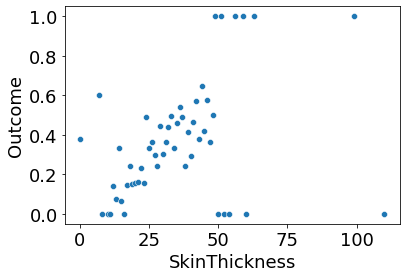

In [43]:
sns.scatterplot(data=SkinThickness, x='SkinThickness', y='Outcome')

In [44]:
Insulin =dia_df.groupby("Insulin",as_index=False).mean(numeric_only=True)

In [45]:
Insulin.corr()

,Insulin,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Insulin,1.000000,0.067948,0.689683,0.097709,0.230858,0.293743,0.121760,0.220556,0.336470
Pregnancies,0.067948,1.000000,0.140785,0.246188,0.070175,0.070041,0.027210,0.628640,0.375416
Glucose,0.689683,0.140785,1.000000,0.181089,0.359423,0.354536,0.192862,0.303565,0.555096
BloodPressure,0.097709,0.246188,0.181089,1.000000,0.276481,0.302257,0.055195,0.351766,0.153756
SkinThickness,0.230858,0.070175,0.359423,0.276481,1.000000,0.672448,0.232765,0.171131,0.361899
BMI,0.293743,0.070041,0.354536,0.302257,0.672448,1.000000,0.112879,0.116086,0.319284
DiabetesPedigreeFunction,0.121760,0.027210,0.192862,0.055195,0.232765,0.112879,1.000000,0.046884,0.154614
Age,0.220556,0.628640,0.303565,0.351766,0.171131,0.116086,0.046884,1.000000,0.432451
Outcome,0.336470,0.375416,0.555096,0.153756,0.361899,0.319284,0.154614,0.432451,1.000000


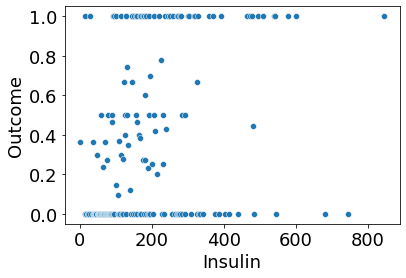

In [46]:
sns.scatterplot(data=Insulin, x='Insulin', y='Outcome') # no correlation 

In [47]:
BMI =dia_df.groupby("BMI",as_index=False).mean(numeric_only=True)

In [48]:
BMI.corr()

,BMI,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
BMI,1.000000,-0.013754,0.376214,0.247853,0.466269,0.258541,0.200094,0.009079,0.431446
Pregnancies,-0.013754,1.000000,0.063055,0.179147,-0.033575,0.031580,-0.096259,0.521263,0.244931
Glucose,0.376214,0.063055,1.000000,0.078756,0.214752,0.415116,0.294198,0.088302,0.428040
BloodPressure,0.247853,0.179147,0.078756,1.000000,0.110645,-0.007083,0.023984,0.165180,0.177741
SkinThickness,0.466269,-0.033575,0.214752,0.110645,1.000000,0.443312,0.258688,-0.146873,0.256348
Insulin,0.258541,0.031580,0.415116,-0.007083,0.443312,1.000000,0.301173,-0.053058,0.106442
DiabetesPedigreeFunction,0.200094,-0.096259,0.294198,0.023984,0.258688,0.301173,1.000000,0.073560,0.147423
Age,0.009079,0.521263,0.088302,0.165180,-0.146873,-0.053058,0.073560,1.000000,0.142906
Outcome,0.431446,0.244931,0.428040,0.177741,0.256348,0.106442,0.147423,0.142906,1.000000


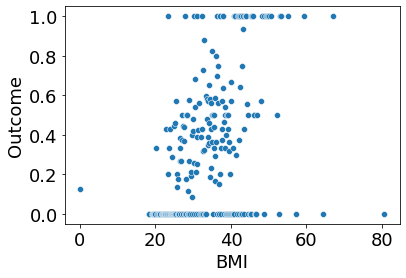

In [49]:
sns.scatterplot(data=BMI, x='BMI', y='Outcome') # weak correlation 

In [50]:
DiabetesPedigreeFunction =dia_df.groupby("DiabetesPedigreeFunction",as_index=False).mean(numeric_only=True)

In [51]:
DiabetesPedigreeFunction.corr()

,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
DiabetesPedigreeFunction,1.000000,0.015978,0.174946,0.069017,0.169971,0.171291,0.114486,0.076427,0.210327
Pregnancies,0.015978,1.000000,0.133824,0.127103,-0.091355,-0.135795,0.009571,0.548807,0.269953
Glucose,0.174946,0.133824,1.000000,0.169937,0.093954,0.329741,0.209987,0.201856,0.458581
BloodPressure,0.069017,0.127103,0.169937,1.000000,0.204384,0.055517,0.271409,0.224518,0.118080
SkinThickness,0.169971,-0.091355,0.093954,0.204384,1.000000,0.411576,0.367548,-0.090150,0.109050
Insulin,0.171291,-0.135795,0.329741,0.055517,0.411576,1.000000,0.198617,-0.095434,0.061814
BMI,0.114486,0.009571,0.209987,0.271409,0.367548,0.198617,1.000000,0.019940,0.274061
Age,0.076427,0.548807,0.201856,0.224518,-0.090150,-0.095434,0.019940,1.000000,0.262798
Outcome,0.210327,0.269953,0.458581,0.118080,0.109050,0.061814,0.274061,0.262798,1.000000


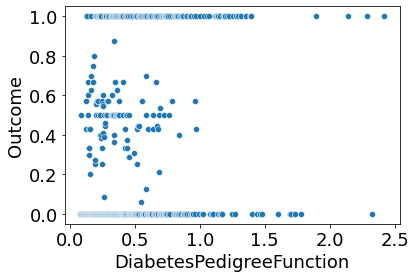

In [52]:
sns.scatterplot(data=DiabetesPedigreeFunction, x='DiabetesPedigreeFunction', y='Outcome') # no correlation  

In [53]:
Age =dia_df.groupby("Age",as_index=False).mean(numeric_only=True)

In [54]:
Age.corr()

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,1.000000,0.465149,0.436879,0.177461,-0.433117,-0.408196,-0.432386,0.012792,-0.042878
Pregnancies,0.465149,1.000000,0.130091,0.462244,-0.005328,-0.015782,0.166479,0.193575,0.221719
Glucose,0.436879,0.130091,1.000000,0.311860,-0.181768,0.077604,-0.178523,-0.271813,0.371265
BloodPressure,0.177461,0.462244,0.311860,1.000000,0.105279,0.091384,0.298747,-0.311208,0.303750
SkinThickness,-0.433117,-0.005328,-0.181768,0.105279,1.000000,0.518565,0.422340,-0.055691,0.195681
Insulin,-0.408196,-0.015782,0.077604,0.091384,0.518565,1.000000,0.282811,0.060293,0.198178
BMI,-0.432386,0.166479,-0.178523,0.298747,0.422340,0.282811,1.000000,-0.014209,0.470152
DiabetesPedigreeFunction,0.012792,0.193575,-0.271813,-0.311208,-0.055691,0.060293,-0.014209,1.000000,0.018504
Outcome,-0.042878,0.221719,0.371265,0.303750,0.195681,0.198178,0.470152,0.018504,1.000000


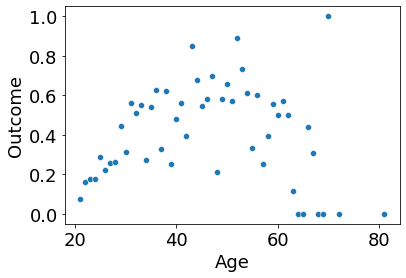

In [55]:
sns.scatterplot(data=Age, x='Age', y='Outcome') # no correlation  

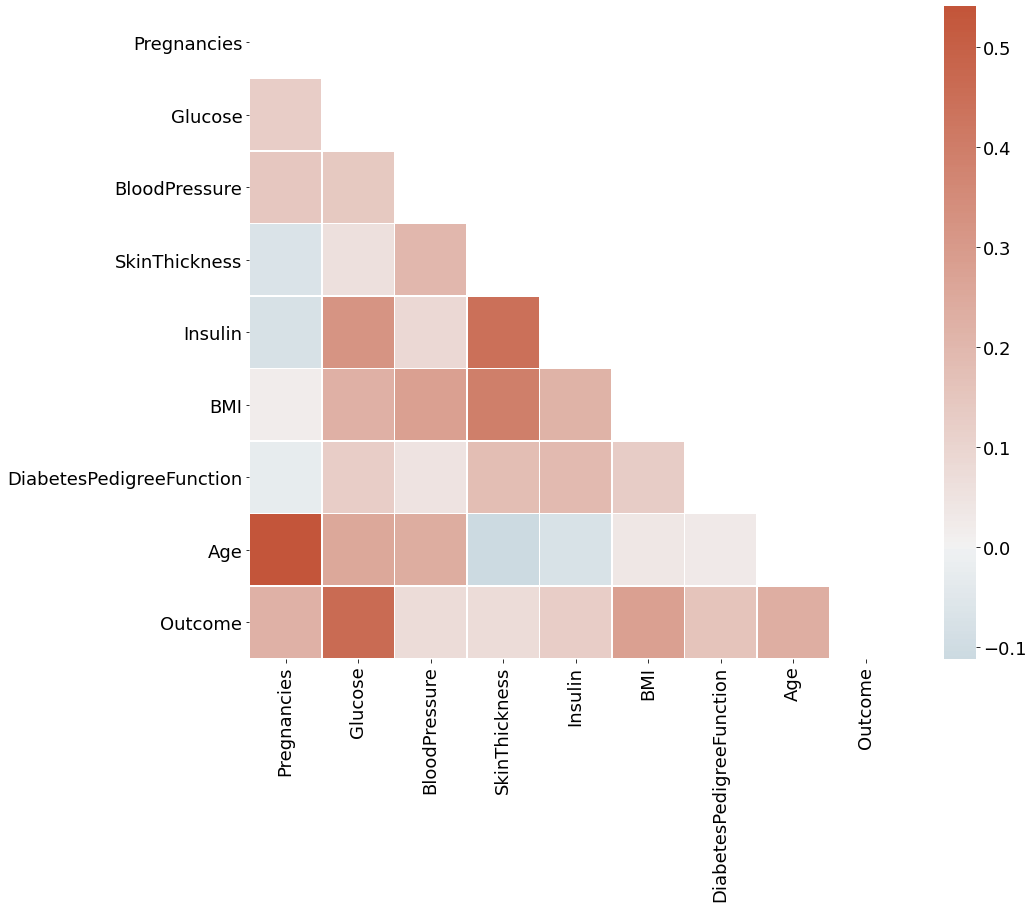

In [56]:
corr=dia_df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

# Conclusion:
- Among all attributes Glucose has the highest correlation with outcome
- So Glucose is a better indicator for determining diabetes
- Pregnancies, BloodPressure, and SkinThickness were other attributes that had strong correlation with outcome.
- Other attributes have weak or nor correaltion with outecome.

# Part 2:

## Now let's create a function that calculates the risk of diabetes. 
We are going to use the parameters that had most impact on Outcome, 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'. 

Note: The rules are only based on observations from data. They have no scientific basis behind them.

In [57]:
def risk_score(number_of_pregnancies, glucose_lvl, blood_pressure, skin_thickness):
    """
    This function takes four input parameters(number_of_pregnancies, glucose_lvl, blood_pressure, skin_thickness) and 
    returns back a new series computed using the following rules to compute a total risk score:
        If the number_of_pregnancies is greater than 5, add 1 to the risk score
        If the glucose_lvl is greater than 130, add 1 to the risk score
        If the blood_pressure is greather than 75, add 1 to the risk score
        If the skin_thickness is greather than 30, add 1 to the risk score
    
    >>> risk_score(4,131,20,10)
    1
    
    >>> risk_score(6,131,20,10)
    2
    
    >>> risk_score(7,140,80,40)
    4
    """
    risk_score =0
    if number_of_pregnancies>5:
        risk_score+=1
        
    if glucose_lvl>130:
        risk_score+=1
    
    if blood_pressure>75:
        risk_score+=1
        
    if skin_thickness>30:
        risk_score+=1
    
    return risk_score

In [58]:
import doctest
doctest.run_docstring_examples(risk_score, globals(), verbose=True)

Finding tests in NoName
Trying:
    risk_score(4,131,20,10)
Expecting:
    1
ok
Trying:
    risk_score(6,131,20,10)
Expecting:
    2
ok
Trying:
    risk_score(7,140,80,40)
Expecting:
    4
ok


In [59]:
dia_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
def score_diabetes(df):
    """
    This function takes your whole Dataframe as input and returns a new Series with risk scores for every record.
    
    >>> score_diabetes(dia_df).max()
    4
    
    >>> score_diabetes(dia_df).min()
    0
    
    >>> score_diabetes(dia_df).value_counts()[2]
    644
    
    """
    df = dia_df
    risk=df.apply(lambda x: risk_score(x['Pregnancies'],x['Glucose'],x['BloodPressure'],x['SkinThickness']), axis=1)
    return risk

In [61]:
doctest.run_docstring_examples(score_diabetes, globals(), verbose=True)

Finding tests in NoName
Trying:
    score_diabetes(dia_df).max()
Expecting:
    4
ok
Trying:
    score_diabetes(dia_df).min()
Expecting:
    0
ok
Trying:
    score_diabetes(dia_df).value_counts()[2]
Expecting:
    644
ok


### Inserting the results of score_diabetes as a new column to our data called Diabetes_Risk_Score

In [62]:
dia_df['Diabetes_Risk_Score']=score_diabetes(dia_df)

In [63]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes_Risk_Score
0,6,148,72,35,0,33.6,0.627,50,1,3
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [64]:
dia_df['Diabetes_Risk_Score'].value_counts()

1    856
0    819
2    644
3    368
4     81
Name: Diabetes_Risk_Score, dtype: int64

#### Now let's look at correlation of Diabetes_Risk_Score and Outcome

In [65]:
Diabetes_Risk_Score =dia_df.groupby("Diabetes_Risk_Score",as_index=False).mean(numeric_only=True)

In [66]:
Diabetes_Risk_Score.corr()

,Diabetes_Risk_Score,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Diabetes_Risk_Score,1.000000,0.983642,0.979763,0.981433,0.990482,0.994674,0.967390,0.796885,0.985101,0.994874
Pregnancies,0.983642,1.000000,0.933762,0.944861,0.997150,0.977708,0.911274,0.732673,0.942621,0.970792
Glucose,0.979763,0.933762,1.000000,0.966678,0.947964,0.982821,0.976604,0.874544,0.980924,0.987997
BloodPressure,0.981433,0.944861,0.966678,1.000000,0.963855,0.975109,0.975990,0.792574,0.997362,0.967880
SkinThickness,0.990482,0.997150,0.947964,0.963855,1.000000,0.987862,0.925959,0.765296,0.960492,0.975442
Insulin,0.994674,0.977708,0.982821,0.975109,0.987862,1.000000,0.950869,0.847840,0.978703,0.987828
BMI,0.967390,0.911274,0.976604,0.975990,0.925959,0.950869,1.000000,0.772474,0.987297,0.974738
DiabetesPedigreeFunction,0.796885,0.732673,0.874544,0.792574,0.765296,0.847840,0.772474,1.000000,0.809733,0.803522
Age,0.985101,0.942621,0.980924,0.997362,0.960492,0.978703,0.987297,0.809733,1.000000,0.978769
Outcome,0.994874,0.970792,0.987997,0.967880,0.975442,0.987828,0.974738,0.803522,0.978769,1.000000


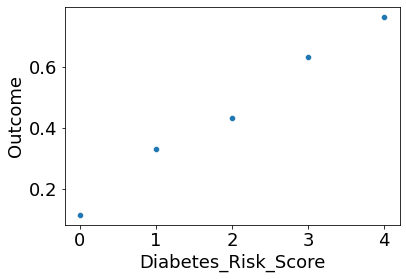

In [67]:
sns.scatterplot(data=Diabetes_Risk_Score, x='Diabetes_Risk_Score', y='Outcome')

## Data Transformation

In [68]:
dia_df['Diabetes_Risk_Score']=dia_df['Diabetes_Risk_Score'].map(str)

In [69]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
 9   Diabetes_Risk_Score       2768 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 216.4+ KB


In [70]:
Diabetes_Risk_Score_Mapping = {
    '0': 'very weak',
    '1': 'weak',
    '2': 'moderate',
    '3': 'strong',
    '4': 'very strong'
}

In [71]:
dia_df['Chance of Diabetes']= dia_df['Diabetes_Risk_Score'].map(Diabetes_Risk_Score_Mapping)

In [72]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes_Risk_Score,Chance of Diabetes
0,6,148,72,35,0,33.6,0.627,50,1,3,strong
1,1,85,66,29,0,26.6,0.351,31,0,0,very weak
2,8,183,64,0,0,23.3,0.672,32,1,2,moderate
3,1,89,66,23,94,28.1,0.167,21,0,0,very weak
4,0,137,40,35,168,43.1,2.288,33,1,2,moderate


In [73]:
dia_df['Chance of Diabetes'].value_counts()

weak           856
very weak      819
moderate       644
strong         368
very strong     81
Name: Chance of Diabetes, dtype: int64

# Conclusion:
- By considdering all the attributes that have high impact on the cotcome we could create a column, "Diabetes_Risk_Score" that is highly
correlated with target.
- The new columns that we added to our dataset can be helpful since it calculates the risk score and indicates the chances of having diabetes. 